# Importing libraries

In [29]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as sklearn
import sklearn.metrics as sklearnm

# Creating a baseline

In [7]:
diamonds=pd.read_csv('./diamonds.csv')

In [8]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [9]:
diamonds['price'].mean()

3934.409644462607

In [10]:
rick_diamonds=pd.read_csv('./rick_diamonds.csv')

In [13]:
rick_diamonds['price_predicted']=diamonds['price'].mean()

In [14]:
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3934.409644
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,3934.409644
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,3934.409644
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3934.409644
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,3934.409644
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3934.409644
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,3934.409644
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3934.409644
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,3934.409644


In [15]:
rick_diamonds.to_csv('rick_diamonds_v1.csv', index=False)

# Developing a prediction model

## Regression using carat as predictor variable

In [250]:
diamonds=pd.read_csv('./diamonds_clean.csv')

In [251]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,counter
0,0.21,Premium,5,2,59.8,61.0,326,3.89,3.84,2.31,1
1,0.23,Good,5,4,56.9,65.0,327,4.05,4.07,2.31,1
2,0.29,Premium,1,3,62.4,58.0,334,4.20,4.23,2.63,1
3,0.31,Good,0,1,63.3,58.0,335,4.34,4.35,2.75,1
4,0.24,Very Good,0,5,62.8,57.0,336,3.94,3.96,2.48,1


In [252]:
model=sklearn.LinearRegression()

In [253]:
X = diamonds[['carat']]
y = diamonds['price']

model.fit(X, y)

LinearRegression()

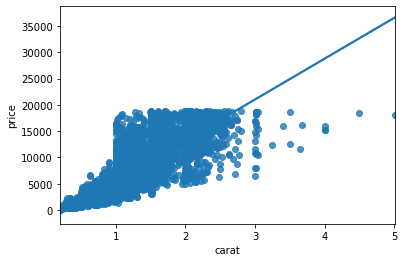

In [254]:
sns.regplot(X,y)

In [255]:
sklearnm.mean_squared_error(diamonds['price'],model.predict(X))

2380375.235074832

In [256]:
sklearnm.r2_score(diamonds['price'],model.predict(X))

0.850426887514948

In [257]:
rick_diamonds['price_predicted']=model.predict(rick_diamonds[['carat']])

In [258]:
rick_diamonds.to_csv('rick_diamonds_v2.csv', index=False)

## Multiple regressions for different ranges of carat

Ranges used for regression:

|Diamond Carat|Price Range ($)|
|---|---|
|0.50 carat|1,220 – 5,800|
|1.0 carat|2,500 – 18,000|
|1.50 carat|3,400 – 24,000|
|2.0 carat|4,200 – 29,000|
|3.0 carat|7,200 – 51,000|
|4.0 carat|8,400 – 71,500|
|5.0 carat|9,600 – 67,500|

In [357]:
diamonds1=diamonds.loc[diamonds['carat']<0.5,:]
diamonds2=diamonds.loc[(diamonds['carat']<=1)&(diamonds['carat']>0.5),:]
diamonds3=diamonds.loc[(diamonds['carat']<=1.5)&(diamonds['carat']>1),:]
diamonds4=diamonds.loc[(diamonds['carat']<=2)&(diamonds['carat']>1.5),:]
diamonds5=diamonds.loc[(diamonds['carat']<=3)&(diamonds['carat']>2),:]
diamonds6=diamonds.loc[(diamonds['carat']<=4)&(diamonds['carat']>3),:]
diamonds7=diamonds.loc[(diamonds['carat']<=5.02)&(diamonds['carat']>4),:]

### Carat<0.5

In [358]:
model_1=sklearn.LinearRegression()
X = diamonds1[['carat']]
y = diamonds1['price']

model_1.fit(X, y)

LinearRegression()

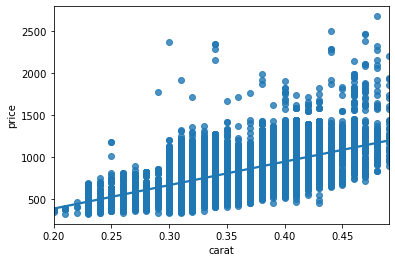

In [359]:
sns.regplot(X,y)

In [360]:
sklearnm.mean_squared_error(diamonds1['price'],model_1.predict(X))

37239.41301468821

In [361]:
sklearnm.r2_score(diamonds1['price'],model_1.predict(X))

0.3778304306461908

### 0.5<Carat<1

In [362]:
model_2=sklearn.LinearRegression()
X = diamonds2[['carat']]
y = diamonds2['price']

model_2.fit(X, y)

LinearRegression()

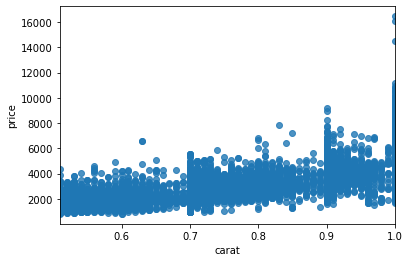

In [363]:
sns.regplot(X,y)

In [364]:
sklearnm.mean_squared_error(diamonds2['price'],model_2.predict(X))

598232.0951586372

In [365]:
sklearnm.r2_score(diamonds2['price'],model_2.predict(X))

0.6439145938319971

### 1<Carat<1.5

In [366]:
model_3=sklearn.LinearRegression()
X = diamonds3[['carat']]
y = diamonds3['price']

model_3.fit(X, y)

LinearRegression()

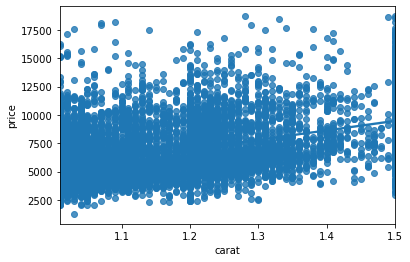

In [367]:
sns.regplot(X,y)

In [368]:
sklearnm.mean_squared_error(diamonds3['price'],model_3.predict(X))

4575732.481211352

In [369]:
sklearnm.r2_score(diamonds3['price'],model_3.predict(X))

0.23572864523671389

### 1.5<Carat<2

In [370]:
model_4=sklearn.LinearRegression()
X = diamonds4[['carat']]
y = diamonds4['price']

model_4.fit(X, y)

LinearRegression()

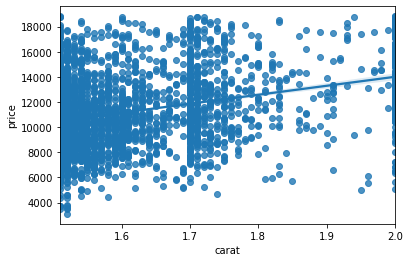

In [371]:
sns.regplot(X,y)

In [274]:
sklearnm.mean_squared_error(diamonds4['price'],model_4.predict(X))

8350087.30267999

In [275]:
sklearnm.r2_score(diamonds4['price'],model_4.predict(X))

0.10971924579711068

### 2<Carat<3

In [276]:
model_5=sklearn.LinearRegression()
X = diamonds5[['carat']]
y = diamonds5['price']

model_5.fit(X, y)

LinearRegression()

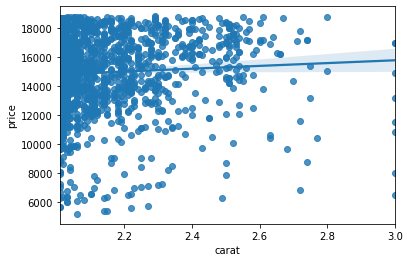

In [277]:
sns.regplot(X,y)

In [278]:
sklearnm.mean_squared_error(diamonds5['price'],model_5.predict(X))

7232756.334640053

In [279]:
sklearnm.r2_score(diamonds5['price'],model_5.predict(X))

0.003582511543735234

### 3<Carat<4

In [280]:
model_6=sklearn.LinearRegression()
X = diamonds6[['carat']]
y = diamonds6['price']

model_6.fit(X, y)

LinearRegression()

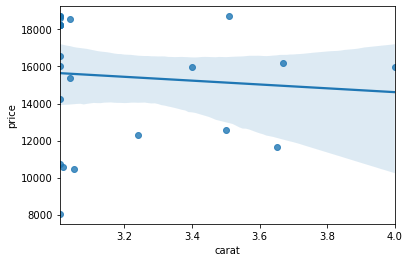

In [281]:
sns.regplot(X,y)

In [282]:
sklearnm.mean_squared_error(diamonds6['price'],model_6.predict(X))

10438934.17515049

In [283]:
sklearnm.r2_score(diamonds6['price'],model_6.predict(X))

0.007882951226310775

### 4<Carat<5.02

In [284]:
model_7=sklearn.LinearRegression()
X = diamonds7[['carat']]
y = diamonds7['price']

model_7.fit(X, y)

LinearRegression()

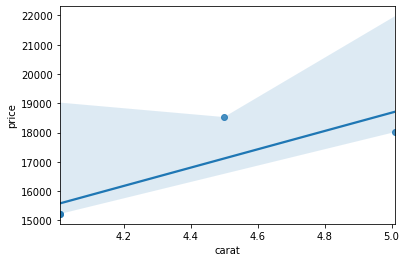

In [285]:
sns.regplot(X,y)

In [286]:
sklearnm.mean_squared_error(diamonds7['price'],model_7.predict(X))

685616.2468525331

In [287]:
sklearnm.r2_score(diamonds7['price'],model_7.predict(X))

0.7095842177831524

### Using the regressions in Rick's dataset

In [288]:
rick_diamonds.describe()

,carat,depth,table,x,y,z,price_predicted,counter
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,0.799144,61.724680,57.516140,5.735516,5.736410,3.539576,3944.708522,1.0
std,0.472936,1.457691,2.244019,1.120300,1.110345,0.694733,3669.680390,0.0
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000,-704.261138,1.0
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000,847.609418,1.0
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000,3253.008778,1.0
75%,1.040000,62.500000,59.000000,6.530000,6.520000,4.032500,5813.595194,1.0
max,4.130000,73.600000,70.000000,10.000000,9.850000,6.430000,29789.995274,1.0


In [289]:
rick_diamonds['counter']=1

In [290]:
diamonds_grouped_carat=rick_diamonds.groupby(pd.cut(rick_diamonds["carat"], np.arange(0, 4.13+0.5, 0.5))).mean()

In [291]:
diamonds_grouped_carat['counter']=rick_diamonds.groupby(pd.cut(rick_diamonds["carat"], np.arange(0, 4.13+0.5, 0.5))).sum()['counter']

In [292]:
diamonds_grouped_carat

,carat,depth,table,x,y,z,price_predicted,counter
carat,,,,,,,,
"(0.0, 0.5]",0.354166,61.699540,57.037169,4.531617,4.542031,2.799269,491.964974,1738
"(0.5, 1.0]",0.725917,61.698166,57.622433,5.729792,5.734010,3.536779,3376.513391,1636
"(1.0, 1.5]",1.141272,61.742794,57.823665,6.690374,6.683265,4.121940,6599.402247,1124
"(1.5, 2.0]",1.632966,61.924771,58.008869,7.529113,7.507706,4.657278,10414.630373,327
"(2.0, 2.5]",2.107605,61.717964,58.389820,8.216886,8.187485,5.060898,14097.517389,167
"(2.5, 3.0]",2.592500,60.175000,59.250000,8.897500,8.855000,5.340000,17859.990380,4
"(3.0, 3.5]",3.113333,63.566667,56.000000,9.293333,9.190000,5.876667,21901.319951,3
"(3.5, 4.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
"(4.0, 4.5]",4.130000,64.800000,61.000000,10.000000,9.850000,6.430000,29789.995274,1


In [293]:
rick_diamonds.loc[rick_diamonds['carat']<=0.5,'price_predicted']=model_1.predict(pd.DataFrame(rick_diamonds.loc[rick_diamonds['carat']<=0.5,'carat']))
rick_diamonds.loc[(rick_diamonds['carat']<=1)&(rick_diamonds['carat']>0.5),'price_predicted']=model_2.predict(pd.DataFrame(rick_diamonds.loc[(rick_diamonds['carat']<=1)&(rick_diamonds['carat']>0.5),'carat']))
rick_diamonds.loc[(rick_diamonds['carat']<=1.5)&(rick_diamonds['carat']>1),'price_predicted']=model_3.predict(pd.DataFrame(rick_diamonds.loc[(rick_diamonds['carat']<=1.5)&(rick_diamonds['carat']>1),'carat']))
rick_diamonds.loc[(rick_diamonds['carat']<=2)&(rick_diamonds['carat']>1.5),'price_predicted']=model_4.predict(pd.DataFrame(rick_diamonds.loc[(rick_diamonds['carat']<=2)&(rick_diamonds['carat']>1.5),'carat']))
rick_diamonds.loc[(rick_diamonds['carat']<=3)&(rick_diamonds['carat']>2),'price_predicted']=model_5.predict(pd.DataFrame(rick_diamonds.loc[(rick_diamonds['carat']<=3)&(rick_diamonds['carat']>2),'carat']))
rick_diamonds.loc[(rick_diamonds['carat']<=4)&(rick_diamonds['carat']>3),'price_predicted']=model_6.predict(pd.DataFrame(rick_diamonds.loc[(rick_diamonds['carat']<=4)&(rick_diamonds['carat']>3),'carat']))
rick_diamonds.loc[(rick_diamonds['carat']<=5)&(rick_diamonds['carat']>4),'price_predicted']=model_7.predict(pd.DataFrame(rick_diamonds.loc[(rick_diamonds['carat']<=5)&(rick_diamonds['carat']>4),'carat']))

In [294]:
diamonds_grouped_carat=rick_diamonds.groupby(pd.cut(rick_diamonds["carat"], np.arange(0, 4.13+0.5, 0.5))).mean()
diamonds_grouped_carat['counter']=rick_diamonds.groupby(pd.cut(rick_diamonds["carat"], np.arange(0, 4.13+0.5, 0.5))).sum()['counter']
diamonds_grouped_carat

,carat,depth,table,x,y,z,price_predicted,counter
carat,,,,,,,,
"(0.0, 0.5]",0.354166,61.699540,57.037169,4.531617,4.542031,2.799269,837.763559,1738
"(0.5, 1.0]",0.725917,61.698166,57.622433,5.729792,5.734010,3.536779,2838.669798,1636
"(1.0, 1.5]",1.141272,61.742794,57.823665,6.690374,6.683265,4.121940,6463.512851,1124
"(1.5, 2.0]",1.632966,61.924771,58.008869,7.529113,7.507706,4.657278,11383.261960,327
"(2.0, 2.5]",2.107605,61.717964,58.389820,8.216886,8.187485,5.060898,14926.804634,167
"(2.5, 3.0]",2.592500,60.175000,59.250000,8.897500,8.855000,5.340000,15394.819561,4
"(3.0, 3.5]",3.113333,63.566667,56.000000,9.293333,9.190000,5.876667,15531.017667,3
"(3.5, 4.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
"(4.0, 4.5]",4.130000,64.800000,61.000000,10.000000,9.850000,6.430000,15959.063460,1


In [295]:
rick_diamonds.to_csv('rick_diamonds_v3.csv', index=False)

## Influence of categorical variables inside a carat range

### Clarity

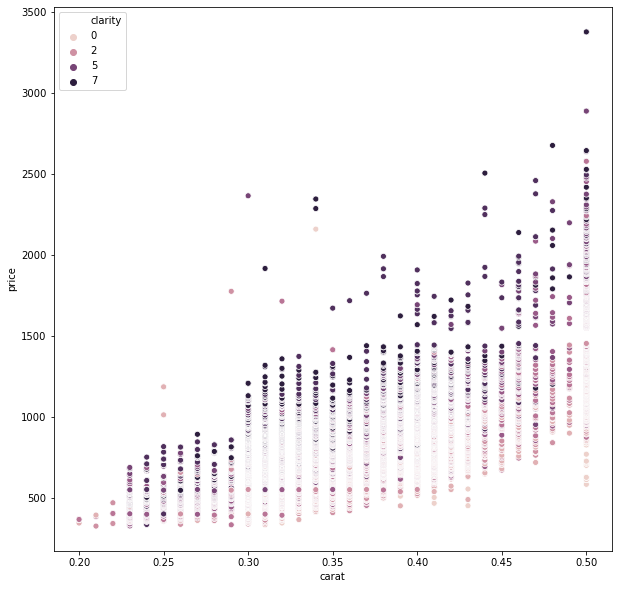

In [296]:
plt.figure(figsize=(10, 10))
sns.scatterplot(diamonds1['carat'],diamonds1['price'],diamonds1['clarity']);

### Color

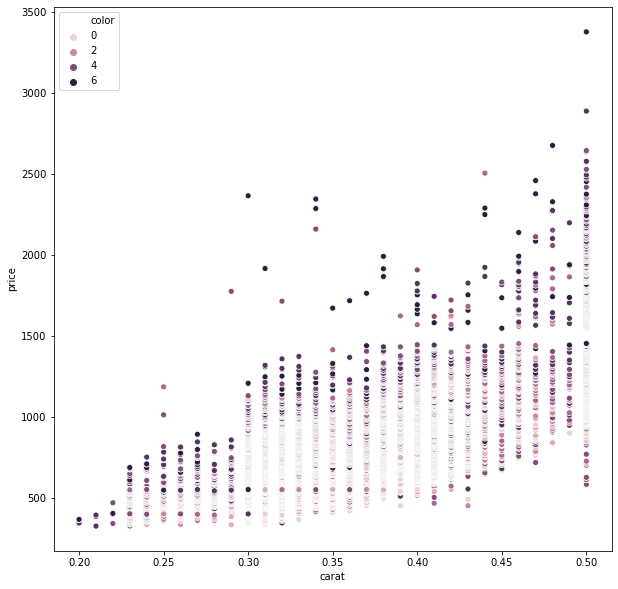

In [297]:
plt.figure(figsize=(10, 10))
sns.scatterplot(diamonds1['carat'],diamonds1['price'],diamonds1['color']);

### Cut

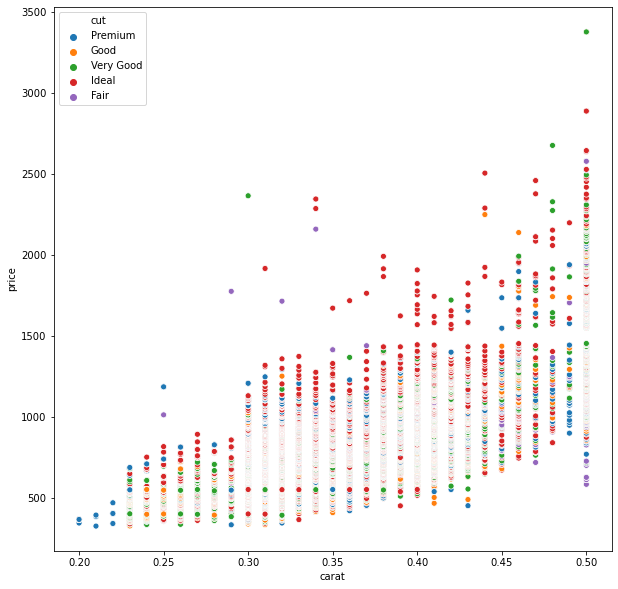

In [298]:
plt.figure(figsize=(10, 10))
sns.scatterplot(diamonds1['carat'],diamonds1['price'],diamonds1['cut']);

### Correlation inside the ranges

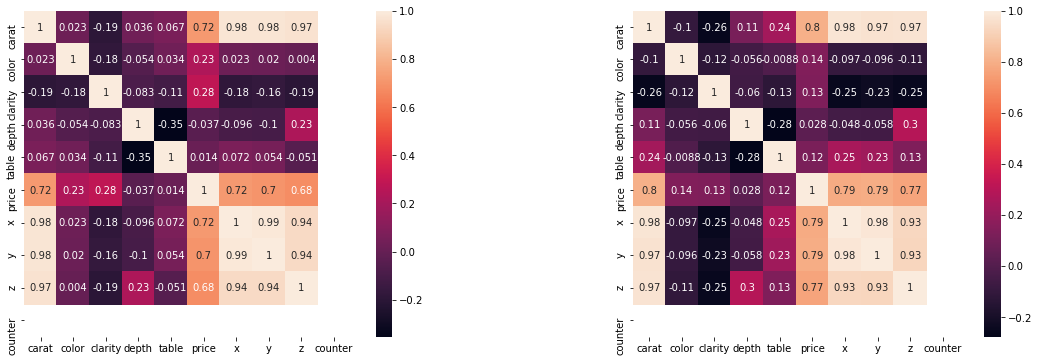

In [299]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))
sns.heatmap(diamonds1.corr(), annot=True, square=True,ax=ax[0])
sns.heatmap(diamonds2.corr(), annot=True, square=True,ax=ax[1]);

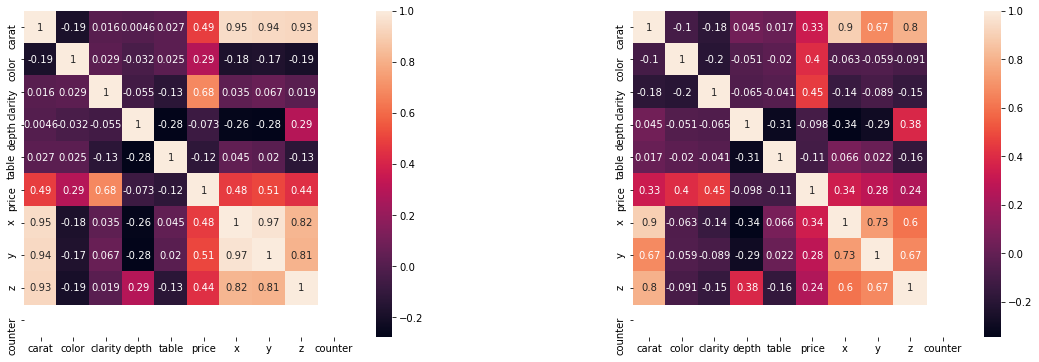

In [300]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))
sns.heatmap(diamonds3.corr(), annot=True, square=True,ax=ax[0])
sns.heatmap(diamonds4.corr(), annot=True, square=True,ax=ax[1]);

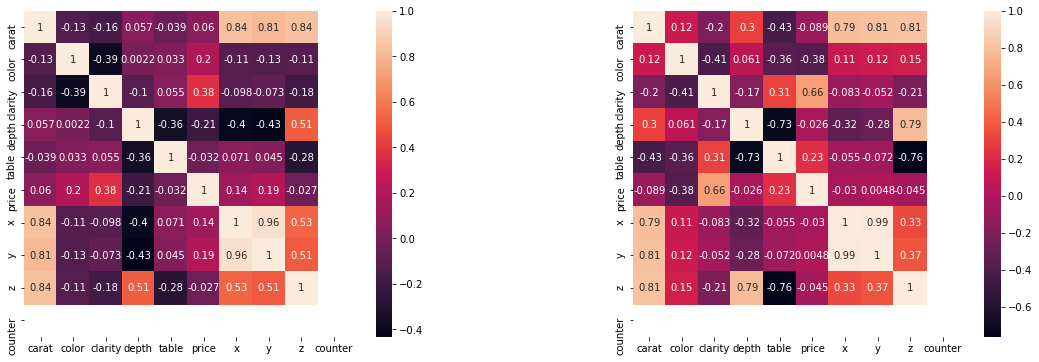

In [301]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))
sns.heatmap(diamonds5.corr(), annot=True, square=True,ax=ax[0])
sns.heatmap(diamonds6.corr(), annot=True, square=True,ax=ax[1]);

In [302]:
# As the value of the carat range increases, the clarity acquires a more relevant correlation

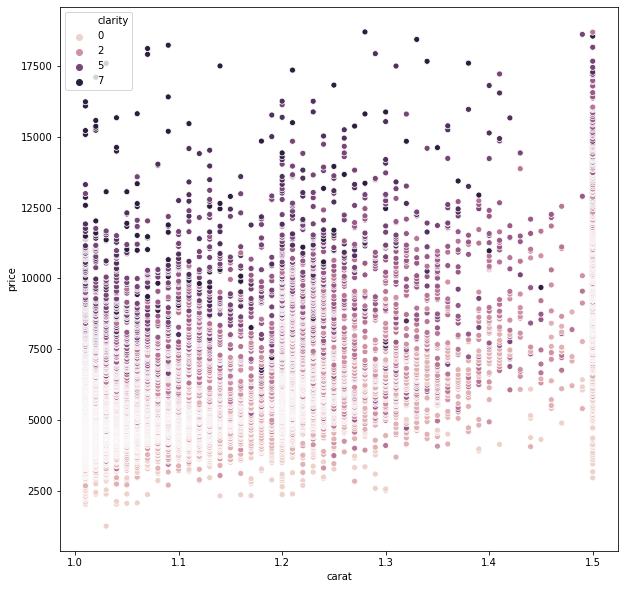

In [303]:
plt.figure(figsize=(10, 10))
sns.scatterplot(diamonds3['carat'],diamonds3['price'],diamonds3['clarity']);

### Test if the regression predictors will be carat and clarity or carat, clarity and color

In [304]:
model_1=sklearn.LinearRegression()
X = diamonds1[['carat','clarity']]
y = diamonds1['price']

model_1.fit(X, y)
RSME=sklearnm.mean_squared_error(diamonds1['price'],model_1.predict(X))
squarred_r=sklearnm.r2_score(diamonds1['price'],model_1.predict(X))
print(f'RSME = {RSME}\nR² = {squarred_r}')

RSME = 28726.52921806166
R² = 0.7006683908037631


In [305]:
model_1=sklearn.LinearRegression()
X = diamonds1[['carat','clarity','color']]
y = diamonds1['price']

model_1.fit(X, y)
RSME=sklearnm.mean_squared_error(diamonds1['price'],model_1.predict(X))
squarred_r=sklearnm.r2_score(diamonds1['price'],model_1.predict(X))
print(f'RSME = {RSME}\nR² = {squarred_r}')

RSME = 20377.751562521735
R² = 0.7876629953897945


In [306]:
model_2=sklearn.LinearRegression()
X = diamonds2[['carat','clarity']]
y = diamonds2['price']

model_2.fit(X, y)
RSME=sklearnm.mean_squared_error(diamonds2['price'],model_2.predict(X))
squarred_r=sklearnm.r2_score(diamonds2['price'],model_2.predict(X))
print(f'RSME = {RSME}\nR² = {squarred_r}')

RSME = 388868.8305029329
R² = 0.7685337905198918


In [307]:
model_2=sklearn.LinearRegression()
X = diamonds2[['carat','clarity','color']]
y = diamonds2['price']

model_2.fit(X, y)
RSME=sklearnm.mean_squared_error(diamonds2['price'],model_2.predict(X))
squarred_r=sklearnm.r2_score(diamonds2['price'],model_2.predict(X))
print(f'RSME = {RSME}\nR² = {squarred_r}')

RSME = 257498.9886427695
R² = 0.8467289991614441


The model results are best with carat, clarity and color

In [308]:
model_3=sklearn.LinearRegression()
X = diamonds3[['carat','clarity','color']]
y = diamonds3['price']

model_3.fit(X, y)
RSME=sklearnm.mean_squared_error(diamonds3['price'],model_3.predict(X))
squarred_r=sklearnm.r2_score(diamonds3['price'],model_3.predict(X))
print(f'RSME = {RSME}\nR² = {squarred_r}')

RSME = 1038126.1861609785
R² = 0.8266047873274157


In [309]:
model_4=sklearn.LinearRegression()
X = diamonds4[['carat','clarity','color']]
y = diamonds4['price']

model_4.fit(X, y)
RSME=sklearnm.mean_squared_error(diamonds4['price'],model_4.predict(X))
squarred_r=sklearnm.r2_score(diamonds4['price'],model_4.predict(X))
print(f'RSME = {RSME}\nR² = {squarred_r}')

RSME = 2745740.2480576225
R² = 0.7072510010642159


In [310]:
model_5=sklearn.LinearRegression()
X = diamonds5[['carat','clarity','color']]
y = diamonds5['price']

model_5.fit(X, y)
RSME=sklearnm.mean_squared_error(diamonds5['price'],model_5.predict(X))
squarred_r=sklearnm.r2_score(diamonds5['price'],model_5.predict(X))
print(f'RSME = {RSME}\nR² = {squarred_r}')

RSME = 4922686.278556839
R² = 0.3218282946093708


In [311]:
model_6=sklearn.LinearRegression()
X = diamonds6[['carat','clarity','color']]
y = diamonds6['price']

model_6.fit(X, y)
RSME=sklearnm.mean_squared_error(diamonds6['price'],model_6.predict(X))
squarred_r=sklearnm.r2_score(diamonds6['price'],model_6.predict(X))
print(f'RSME = {RSME}\nR² = {squarred_r}')

RSME = 5811919.261761005
R² = 0.44763477870994794


In [312]:
model_7=sklearn.LinearRegression()
X = diamonds7[['carat','clarity','color']]
y = diamonds7['price']

model_7.fit(X, y)
RSME=sklearnm.mean_squared_error(diamonds7['price'],model_7.predict(X))
squarred_r=sklearnm.r2_score(diamonds7['price'],model_7.predict(X))
print(f'RSME = {RSME}\nR² = {squarred_r}')

RSME = 626181.2429176101
R² = 0.7347599093424784


### Adjusting Rick's dataset categorical variable

In [313]:
rick_diamonds.loc[rick_diamonds['clarity']=='I1','clarity']=0
rick_diamonds.loc[rick_diamonds['clarity']=='SI2','clarity']=1
rick_diamonds.loc[rick_diamonds['clarity']=='SI1','clarity']=2
rick_diamonds.loc[rick_diamonds['clarity']=='VS2','clarity']=3
rick_diamonds.loc[rick_diamonds['clarity']=='VS1','clarity']=4
rick_diamonds.loc[rick_diamonds['clarity']=='VVS2','clarity']=5
rick_diamonds.loc[rick_diamonds['clarity']=='VVS1','clarity']=6
rick_diamonds.loc[rick_diamonds['clarity']=='IF','clarity']=7

In [314]:
rick_diamonds.loc[rick_diamonds['color']=='J','color']=0
rick_diamonds.loc[rick_diamonds['color']=='I','color']=1
rick_diamonds.loc[rick_diamonds['color']=='H','color']=2
rick_diamonds.loc[rick_diamonds['color']=='G','color']=3
rick_diamonds.loc[rick_diamonds['color']=='F','color']=4
rick_diamonds.loc[rick_diamonds['color']=='E','color']=5
rick_diamonds.loc[rick_diamonds['color']=='D','color']=6

In [315]:
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted,counter
0,0.91,Very Good,2,1,63.4,57.0,6.10,6.18,3.89,4068.976200,1
1,0.38,Good,4,3,60.3,61.0,4.68,4.71,2.83,926.458162,1
2,0.52,Ideal,2,3,61.8,56.0,5.19,5.16,3.20,1462.439154,1
3,1.10,Ideal,3,4,61.3,56.0,6.65,6.69,4.09,6118.271725,1
4,2.28,Ideal,3,1,61.6,57.0,8.44,8.37,5.18,15093.198382,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,6,1,62.2,59.0,4.25,4.30,2.66,651.801199,1
4996,0.51,Ideal,4,5,61.9,56.0,5.09,5.14,3.16,1395.604871,1
4997,1.01,Very Good,4,2,60.6,60.0,6.37,6.43,3.88,5365.424295,1
4998,0.31,Ideal,4,6,62.1,56.0,4.35,4.38,2.71,686.133319,1


### Using the new regressions

In [316]:
rick_diamonds.loc[rick_diamonds['carat']<=0.5,'price_predicted']=model_1.predict(pd.DataFrame(rick_diamonds.loc[rick_diamonds['carat']<=0.5,['carat','clarity','color']]))
rick_diamonds.loc[(rick_diamonds['carat']<=1)&(rick_diamonds['carat']>0.5),'price_predicted']=model_2.predict(pd.DataFrame(rick_diamonds.loc[(rick_diamonds['carat']<=1)&(rick_diamonds['carat']>0.5),['carat','clarity','color']]))
rick_diamonds.loc[(rick_diamonds['carat']<=1.5)&(rick_diamonds['carat']>1),'price_predicted']=model_3.predict(pd.DataFrame(rick_diamonds.loc[(rick_diamonds['carat']<=1.5)&(rick_diamonds['carat']>1),['carat','clarity','color']]))
rick_diamonds.loc[(rick_diamonds['carat']<=2)&(rick_diamonds['carat']>1.5),'price_predicted']=model_4.predict(pd.DataFrame(rick_diamonds.loc[(rick_diamonds['carat']<=2)&(rick_diamonds['carat']>1.5),['carat','clarity','color']]))
rick_diamonds.loc[(rick_diamonds['carat']<=3)&(rick_diamonds['carat']>2),'price_predicted']=model_5.predict(pd.DataFrame(rick_diamonds.loc[(rick_diamonds['carat']<=3)&(rick_diamonds['carat']>2),['carat','clarity','color']]))
rick_diamonds.loc[(rick_diamonds['carat']<=4)&(rick_diamonds['carat']>3),'price_predicted']=model_6.predict(pd.DataFrame(rick_diamonds.loc[(rick_diamonds['carat']<=4)&(rick_diamonds['carat']>3),['carat','clarity','color']]))
rick_diamonds.loc[(rick_diamonds['carat']<=5)&(rick_diamonds['carat']>4),'price_predicted']=model_7.predict(pd.DataFrame(rick_diamonds.loc[(rick_diamonds['carat']<=5)&(rick_diamonds['carat']>4),['carat','clarity','color']]))

In [317]:
diamonds_grouped_carat=rick_diamonds.groupby(pd.cut(rick_diamonds["carat"], np.arange(0, 4.13+0.5, 0.5))).mean()
diamonds_grouped_carat['counter']=rick_diamonds.groupby(pd.cut(rick_diamonds["carat"], np.arange(0, 4.13+0.5, 0.5))).sum()['counter']
diamonds_grouped_carat

,carat,depth,table,x,y,z,price_predicted,counter
carat,,,,,,,,
"(0.0, 0.5]",0.354166,61.699540,57.037169,4.531617,4.542031,2.799269,837.882697,1738
"(0.5, 1.0]",0.725917,61.698166,57.622433,5.729792,5.734010,3.536779,2794.481105,1636
"(1.0, 1.5]",1.141272,61.742794,57.823665,6.690374,6.683265,4.121940,6403.549176,1124
"(1.5, 2.0]",1.632966,61.924771,58.008869,7.529113,7.507706,4.657278,11328.678211,327
"(2.0, 2.5]",2.107605,61.717964,58.389820,8.216886,8.187485,5.060898,15096.633169,167
"(2.5, 3.0]",2.592500,60.175000,59.250000,8.897500,8.855000,5.340000,15274.429024,4
"(3.0, 3.5]",3.113333,63.566667,56.000000,9.293333,9.190000,5.876667,13585.791930,3
"(3.5, 4.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
"(4.0, 4.5]",4.130000,64.800000,61.000000,10.000000,9.850000,6.430000,14896.313758,1


In [373]:
rick_diamonds.sort_values(by='price_predicted')#.loc[rick_diamonds.sort_values(by='price_predicted')['price_predicted']<300,:]

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted,counter
2084,0.51,Very Good,1,1,61.2,56.0,5.12,5.14,3.14,-92.377128,1
2604,0.51,Very Good,0,2,62.6,59.0,5.06,5.10,3.18,42.899389,1
347,0.51,Very Good,0,2,63.3,56.0,5.12,5.02,3.21,42.899389,1
1379,0.52,Very Good,0,2,62.5,59.0,5.14,5.16,3.22,120.969432,1
1593,0.51,Premium,2,1,62.9,56.0,5.08,5.06,3.19,130.738156,1
...,...,...,...,...,...,...,...,...,...,...,...
974,2.07,Ideal,0,5,62.7,54.0,8.17,8.12,5.11,18507.728691,1
4878,2.04,Good,6,2,61.9,60.0,8.15,8.11,5.03,18643.261313,1
1541,2.38,Premium,2,4,60.9,59.0,8.62,8.59,5.24,19651.808874,1
3932,2.16,Premium,0,6,61.5,58.0,8.36,8.26,5.11,20382.099774,1


In [318]:
rick_diamonds.to_csv('rick_diamonds_v4.csv', index=False)

## Extra test: regressions for each categorical

### Clarity

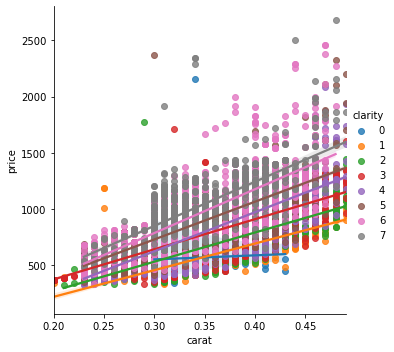

In [377]:
sns.lmplot('carat','price',hue='clarity',data=diamonds1);

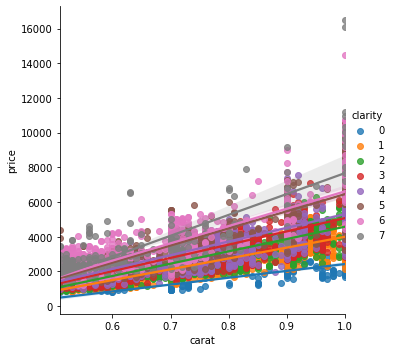

In [378]:
sns.lmplot('carat','price',hue='clarity',data=diamonds2);

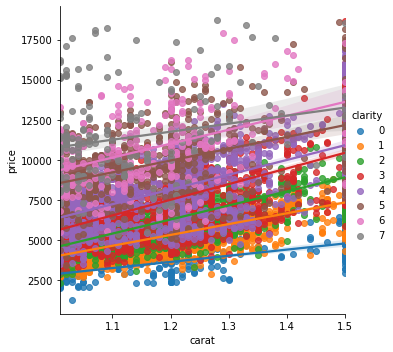

In [379]:
sns.lmplot('carat','price',hue='clarity',data=diamonds3);

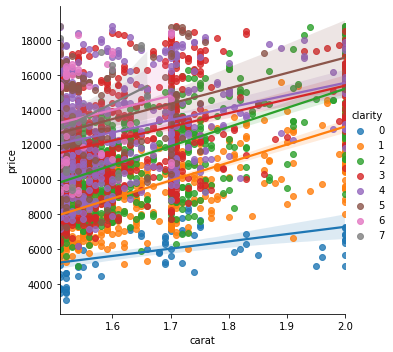

In [376]:
sns.lmplot('carat','price',hue='clarity',data=diamonds4);

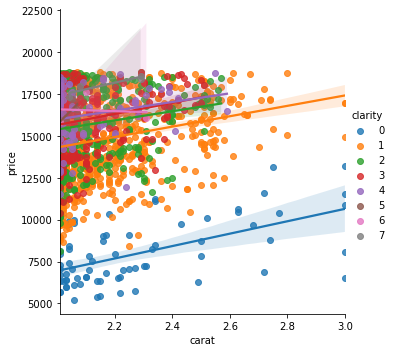

In [380]:
sns.lmplot('carat','price',hue='clarity',data=diamonds5);

### Color

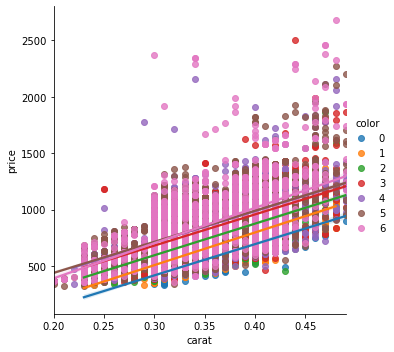

In [381]:
sns.lmplot('carat','price',hue='color',data=diamonds1);

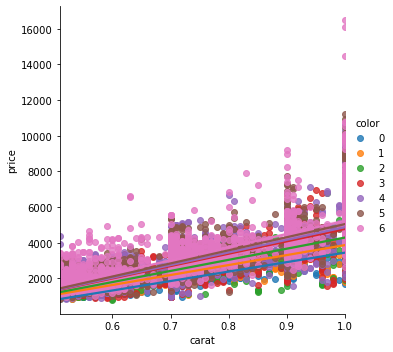

In [385]:
sns.lmplot('carat','price',hue='color',data=diamonds2);

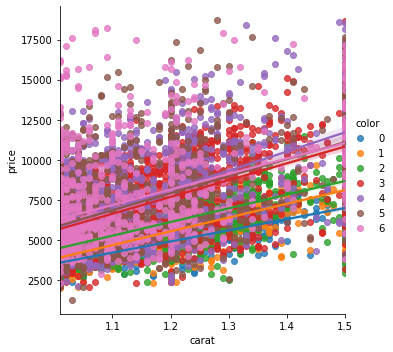

In [383]:
sns.lmplot('carat','price',hue='color',data=diamonds3);

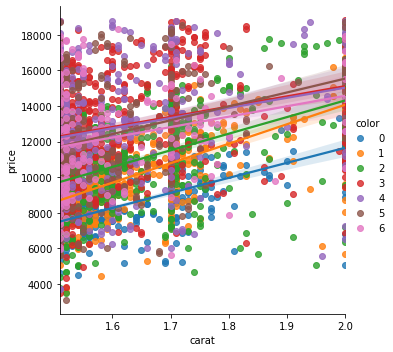

In [384]:
sns.lmplot('carat','price',hue='color',data=diamonds4);

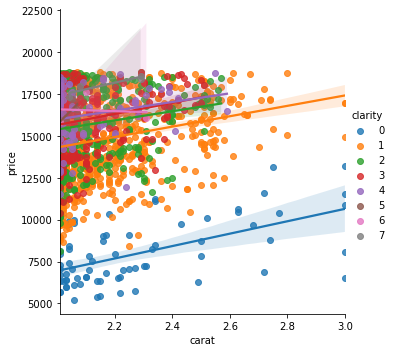

In [380]:
sns.lmplot('carat','price',hue='color',data=diamonds5);

### Cut

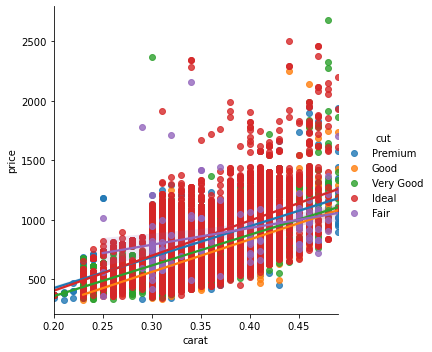

In [386]:
sns.lmplot('carat','price',hue='cut',data=diamonds1);

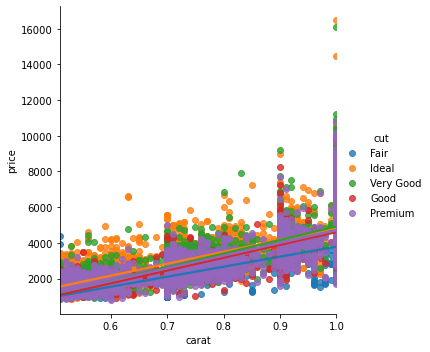

In [387]:
sns.lmplot('carat','price',hue='cut',data=diamonds2);

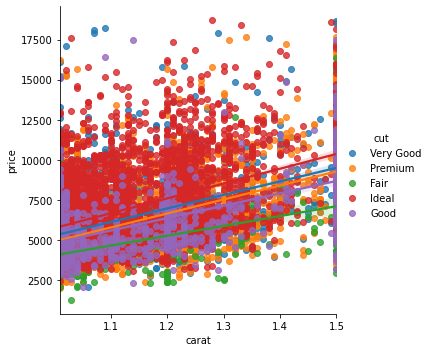

In [388]:
sns.lmplot('carat','price',hue='cut',data=diamonds3);

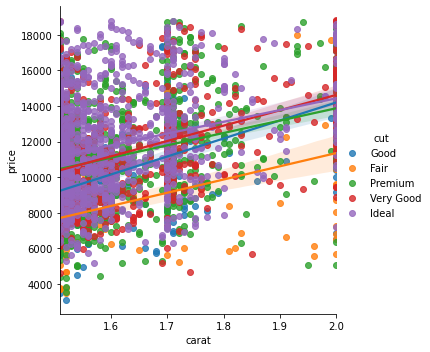

In [389]:
sns.lmplot('carat','price',hue='cut',data=diamonds4);

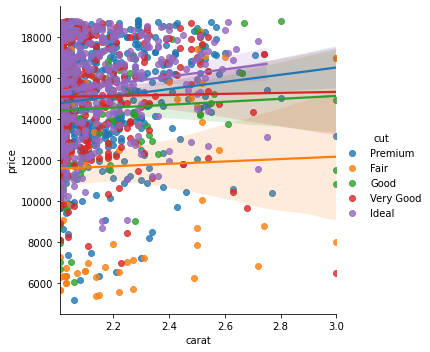

In [390]:
sns.lmplot('carat','price',hue='cut',data=diamonds5);

# Attempts log

In [327]:
attempts_log=pd.DataFrame(columns=['Attempt','RMSE','File','Comment'])

In [328]:
attempts_log.loc[len(attempts_log.index)]=[1,3980.713882502374,'rick_diamonds_v1.csv','Used the mean of the historical dataset as prediction method to create a baseline']

In [329]:
attempts_log.loc[len(attempts_log.index)]=[2,1605.15175707362,'rick_diamonds_v2.csv','Regression using carat as predictor variable']

In [330]:
attempts_log.loc[len(attempts_log.index)]=[3,1467.8736329291685,'rick_diamonds_v3.csv','Different regressions for each carat range']

In [331]:
attempts_log.loc[len(attempts_log.index)]=[4,872.7707843313649,'rick_diamonds_v4.csv','Using regressions with carat, clarity and color as predictors for each carat range']

In [326]:
attempts_log

,Attempt,MSE,File,Comment
0,1,3980.713883,rick_diamonds_v1.csv,Used the mean of the historical dataset as pre...
1,2,1605.151757,rick_diamonds_v2.csv,Regression using carat as predictor variable
2,3,1467.873633,rick_diamonds_v3.csv,Different regressions for each carat range
3,4,872.770784,rick_diamonds_v4.csv,"Using regressions with carat, clarity and colo..."
